# **Logistic Regression, Random Forest and KNN**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# **Reading CSV**

In [ ]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data.shape

(32897, 23)

In [ ]:
categorical_col, contin_val=[],[]

for i in data.columns:
    if data[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)

print(categorical_col)
print(contin_val)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# **Null Values**

In [ ]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            499
MaxTemp            370
Rainfall           687
Evaporation      19072
Sunshine         23517
WindGustDir       4867
WindGustSpeed     4863
WindDir9am        4468
WindDir3pm        2100
WindSpeed9am       829
WindSpeed3pm      1475
Humidity9am        666
Humidity3pm       1330
Pressure9am       6684
Pressure3pm       6680
Cloud9am         15811
Cloud3pm         16140
Temp9am            437
Temp3pm           1105
RainToday          687
RainTomorrow       687
dtype: int64

# **Yes - 1 | No - 0**

In [ ]:
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})
data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})

print(data.RainToday)
print(data.RainTomorrow)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32892    0.0
32893    0.0
32894    0.0
32895    0.0
32896    NaN
Name: RainToday, Length: 32897, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32892    0.0
32893    0.0
32894    0.0
32895    0.0
32896    NaN
Name: RainTomorrow, Length: 32897, dtype: float64


# **Missing Values**

In [ ]:
(data.isnull().sum()/len(data)) * 100

Date              0.000000
Location          0.000000
MinTemp           1.516856
MaxTemp           1.124723
Rainfall          2.088336
Evaporation      57.974891
Sunshine         71.486762
WindGustDir      14.794662
WindGustSpeed    14.782503
WindDir9am       13.581786
WindDir3pm        6.383561
WindSpeed9am      2.519987
WindSpeed3pm      4.483692
Humidity9am       2.024501
Humidity3pm       4.042922
Pressure9am      20.317962
Pressure3pm      20.305803
Cloud9am         48.062133
Cloud3pm         49.062225
Temp9am           1.328389
Temp3pm           3.358969
RainToday         2.088336
RainTomorrow      2.088336
dtype: float64

In [ ]:
#Filling the missing values for continuous variables with mean
data['MinTemp']=data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp']=data['MinTemp'].fillna(data['MaxTemp'].mean())
data['Rainfall']=data['Rainfall'].fillna(data['Rainfall'].mean())
data['Evaporation']=data['Evaporation'].fillna(data['Evaporation'].mean())
data['Sunshine']=data['Sunshine'].fillna(data['Sunshine'].mean())
data['WindGustSpeed']=data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindSpeed9am']=data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity9am']=data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm']=data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Pressure9am']=data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm']=data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Cloud9am']=data['Cloud9am'].fillna(data['Cloud9am'].mean())
data['Cloud3pm']=data['Cloud3pm'].fillna(data['Cloud3pm'].mean())
data['Temp9am']=data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm']=data['Temp3pm'].fillna(data['Temp3pm'].mean())

In [ ]:
#Filling continuous variables with mode

data['RainToday'] = data['RainToday'].fillna(data['RainToday'].mode()[0])
data['RainTomorrow'] = data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])

In [ ]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,13.4,0.600000,5.614676,7.623433,W,44.000000,W,...,71.000000,22.000000,1007.700000,1007.100000,8.000000,4.425554,16.900000,21.800000,0.0,0.0
1,2008-12-02,Albury,7.4,7.4,0.000000,5.614676,7.623433,WNW,44.000000,NNW,...,44.000000,25.000000,1010.600000,1007.800000,4.316282,4.425554,17.200000,24.300000,0.0,0.0
2,2008-12-03,Albury,12.9,12.9,0.000000,5.614676,7.623433,WSW,46.000000,W,...,38.000000,30.000000,1007.600000,1008.700000,4.316282,2.000000,21.000000,23.200000,0.0,0.0
3,2008-12-04,Albury,9.2,9.2,0.000000,5.614676,7.623433,NE,24.000000,SE,...,45.000000,16.000000,1017.600000,1012.800000,4.316282,4.425554,18.100000,26.500000,0.0,0.0
4,2008-12-05,Albury,17.5,17.5,1.000000,5.614676,7.623433,W,41.000000,ENE,...,82.000000,33.000000,1010.800000,1006.000000,7.000000,8.000000,17.800000,29.700000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32892,2015-10-07,Sydney,19.7,19.7,0.000000,13.200000,1.300000,SSW,67.000000,SSE,...,61.000000,56.000000,1029.600000,1033.600000,5.000000,7.000000,20.300000,19.000000,0.0,0.0
32893,2015-10-08,Sydney,17.0,17.0,0.000000,6.600000,2.200000,ENE,35.000000,ESE,...,53.000000,57.000000,1038.800000,1036.000000,7.000000,7.000000,18.500000,19.900000,0.0,0.0
32894,2015-10-09,Sydney,16.8,16.8,0.000000,5.400000,8.700000,ENE,43.000000,N,...,51.000000,51.000000,1034.400000,1029.700000,7.000000,5.000000,20.100000,22.000000,0.0,0.0
32895,2015-10-10,Sydney,15.7,15.7,0.000000,6.800000,9.500000,E,24.000000,SE,...,62.000000,60.000000,1028.900000,1025.800000,1.000000,4.000000,21.200000,22.300000,0.0,0.0


In [ ]:
#Drop date column
data=data.iloc[:,1:]
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,13.4,0.600000,5.614676,7.623433,W,44.000000,W,WNW,...,71.000000,22.000000,1007.700000,1007.100000,8.000000,4.425554,16.900000,21.800000,0.0,0.0
1,Albury,7.4,7.4,0.000000,5.614676,7.623433,WNW,44.000000,NNW,WSW,...,44.000000,25.000000,1010.600000,1007.800000,4.316282,4.425554,17.200000,24.300000,0.0,0.0
2,Albury,12.9,12.9,0.000000,5.614676,7.623433,WSW,46.000000,W,WSW,...,38.000000,30.000000,1007.600000,1008.700000,4.316282,2.000000,21.000000,23.200000,0.0,0.0
3,Albury,9.2,9.2,0.000000,5.614676,7.623433,NE,24.000000,SE,E,...,45.000000,16.000000,1017.600000,1012.800000,4.316282,4.425554,18.100000,26.500000,0.0,0.0
4,Albury,17.5,17.5,1.000000,5.614676,7.623433,W,41.000000,ENE,NW,...,82.000000,33.000000,1010.800000,1006.000000,7.000000,8.000000,17.800000,29.700000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32892,Sydney,19.7,19.7,0.000000,13.200000,1.300000,SSW,67.000000,SSE,SE,...,61.000000,56.000000,1029.600000,1033.600000,5.000000,7.000000,20.300000,19.000000,0.0,0.0
32893,Sydney,17.0,17.0,0.000000,6.600000,2.200000,ENE,35.000000,ESE,E,...,53.000000,57.000000,1038.800000,1036.000000,7.000000,7.000000,18.500000,19.900000,0.0,0.0
32894,Sydney,16.8,16.8,0.000000,5.400000,8.700000,ENE,43.000000,N,NE,...,51.000000,51.000000,1034.400000,1029.700000,7.000000,5.000000,20.100000,22.000000,0.0,0.0
32895,Sydney,15.7,15.7,0.000000,6.800000,9.500000,E,24.000000,SE,E,...,62.000000,60.000000,1028.900000,1025.800000,1.000000,4.000000,21.200000,22.300000,0.0,0.0


**Encoding the categorical variables**

In [ ]:
le = preprocessing.LabelEncoder()
data['Location'] = le.fit_transform(data['Location'])
data['WindDir9am'] = le.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = le.fit_transform(data['WindDir3pm'])
data['WindGustDir'] = le.fit_transform(data['WindGustDir'])

In [ ]:
data.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,13.4,13.4,0.6,5.614676,7.623433,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.425554,16.9,21.8,0.0,0.0
1,0,7.4,7.4,0.0,5.614676,7.623433,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.316282,4.425554,17.2,24.3,0.0,0.0
2,0,12.9,12.9,0.0,5.614676,7.623433,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.316282,2.000000,21.0,23.2,0.0,0.0
3,0,9.2,9.2,0.0,5.614676,7.623433,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.316282,4.425554,18.1,26.5,0.0,0.0
4,0,17.5,17.5,1.0,5.614676,7.623433,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=80)

# **Algorithms**

**1. Logistic Regression**

In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

conf = confusion_matrix(y_test, y_pred)
print(f"The accuracy of Logistic Regression is: {accuracy_score(y_test, y_pred) * 100} %")

The accuracy of Logistic Regression is: 85.04559270516717 %


In [ ]:
model.score(x_test, y_test)

0.8504559270516717

In [ ]:
y_pred

array([0., 1., 1., ..., 0., 1., 0.])

In [ ]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[4926,  239],
       [ 745,  670]])

Text(95.72222222222221, 0.5, 'Actual')

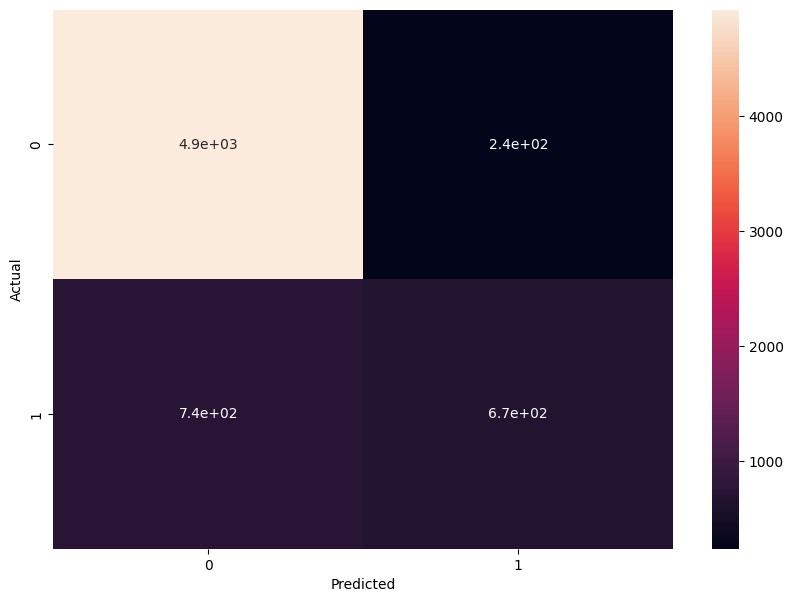

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      5165
         1.0       0.74      0.47      0.58      1415

    accuracy                           0.85      6580
   macro avg       0.80      0.71      0.74      6580
weighted avg       0.84      0.85      0.84      6580



**2. RandomForest**

In [ ]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"The accuracy of Random Forest is: {accuracy_score(y_test, y_pred.round()) * 100} %")

The accuracy of Random Forest is: 85.69908814589665 %


In [ ]:
y_pred

array([0., 1., 1., ..., 0., 1., 0.])

In [ ]:
y_test

25364    0.0
16659    1.0
9910     1.0
26244    0.0
8954     0.0
        ... 
19777    0.0
21402    0.0
5668     0.0
30972    1.0
32877    0.0
Name: RainTomorrow, Length: 6580, dtype: float64

In [ ]:
model.score(x_test, y_test)

0.8569908814589665

In [ ]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[4969,  196],
       [ 745,  670]])

Text(95.72222222222221, 0.5, 'Actual')

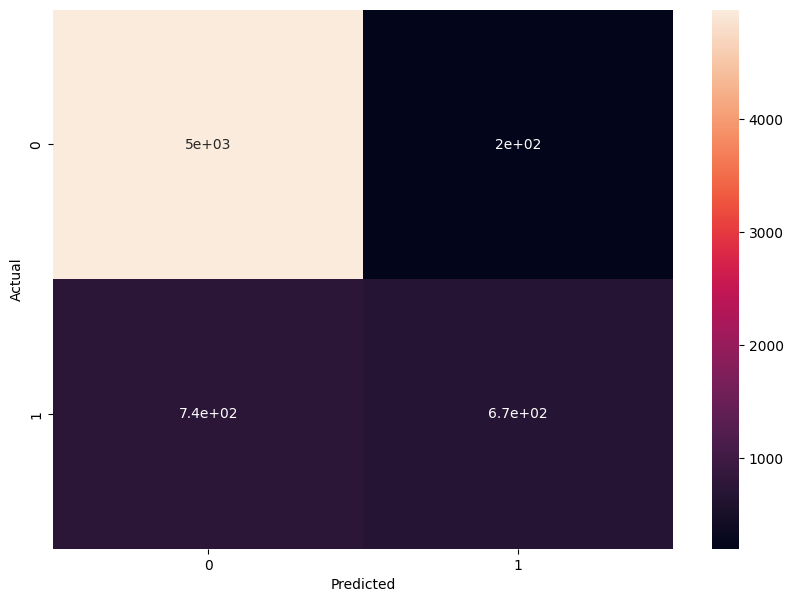

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      5165
         1.0       0.77      0.47      0.59      1415

    accuracy                           0.86      6580
   macro avg       0.82      0.72      0.75      6580
weighted avg       0.85      0.86      0.84      6580



In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_test

25364    0.0
16659    1.0
9910     1.0
26244    0.0
8954     0.0
        ... 
19777    0.0
21402    0.0
5668     0.0
30972    1.0
32877    0.0
Name: RainTomorrow, Length: 6580, dtype: float64

In [ ]:
classifier.score(x_test, y_test)

0.843161094224924

In [ ]:
print(f"The accuracy of KNN is: {accuracy_score(y_test, y_pred.round()) * 100} %")

The accuracy of KNN is: 84.3161094224924 %


**3. KNN**

In [ ]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[4883,  282],
       [ 750,  665]])

Text(95.72222222222221, 0.5, 'Actual')

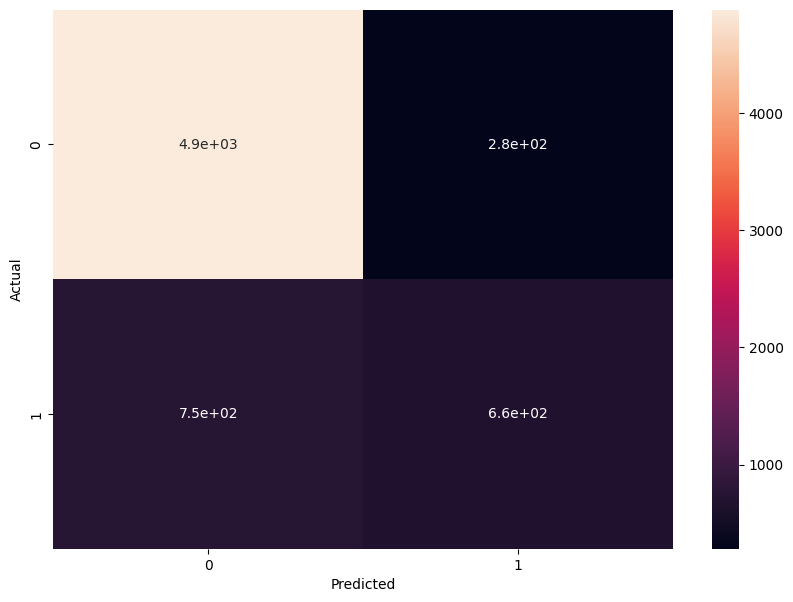

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.90      5165
         1.0       0.70      0.47      0.56      1415

    accuracy                           0.84      6580
   macro avg       0.78      0.71      0.73      6580
weighted avg       0.83      0.84      0.83      6580

